# Portfolio Monte Carlo

###### The goal of this program is to read in the top 5 best performing stock market sectors. Once the data is loaded in, get the Sharpe Ratio of each ticker, then create a Monte Carlo simulation before finally getting the recommended portfolio allocations.

## Import Libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read Barchart .CSV

In [57]:
VGT = pd.read_csv("/home/justinoo/Downloads/vgt_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)
VCR = pd.read_csv("/home/justinoo/Downloads/vcr_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)
XLI = pd.read_csv("/home/justinoo/Downloads/xli_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)
XLC = pd.read_csv("/home/justinoo/Downloads/xlc_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)
XLB = pd.read_csv("/home/justinoo/Downloads/xlb_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)

## Reverse DataFrame Rows

In [58]:
VGT = VGT[::-1]

In [59]:
VCR = VCR[::-1]

In [60]:
XLI = XLI[::-1]

In [61]:
XLB = XLB[::-1]

In [62]:
XLC = XLC[::-1]

### Remove NaNs
- removes "Downloaded from Barchart" in last row

In [63]:
VGT = VGT.dropna()

In [64]:
VCR = VCR.dropna()

In [65]:
XLI = XLI.dropna()

In [66]:
XLC = XLC.dropna()

In [67]:
XLB = XLB.dropna()

### Preview Data

In [68]:
VGT.tail()

,Open,High,Low,Last,Change,%Chg,Volume
Time,,,,,,,
12/22/2023,484.54,485.0975,481.30,483.61,0.47,+0.10%,395200.0
12/26/2023,484.59,487.0800,484.30,486.00,2.39,+0.49%,319200.0
12/27/2023,486.22,487.1400,484.18,486.47,0.47,+0.10%,638900.0
12/28/2023,487.46,487.8400,486.35,486.79,0.32,+0.07%,320700.0
12/29/2023,486.98,487.6000,481.91,484.00,-2.79,-0.57%,533100.0


## 1. Compute Daily Return
- Create a new column for daily returns
- Also creates an NaN column

In [69]:
VGT['Daily Returns'] = round(VGT['Last'].pct_change(1) * 100, 2)
VCR['Daily Returns'] = round(VCR['Last'].pct_change(1) * 100, 2)
XLI['Daily Returns'] = round(XLI['Last'].pct_change(1) * 100, 2)
XLC['Daily Returns'] = round(XLC['Last'].pct_change(1) * 100, 2)
XLB['Daily Returns'] = round(XLB['Last'].pct_change(1) * 100, 2)

### Drops NaN from pct_change(1)

In [70]:
VGT = VGT.dropna()
VCR = VCR.dropna()
XLI = XLI.dropna()
XLC = XLC.dropna()
XLB = XLB.dropna()

In [71]:
XLB.head() # dropping NaN leaves -1 row

,Open,High,Low,Last,Change,%Chg,Volume,Daily Returns
Time,,,,,,,,
01/03/2019,50.51,50.510,49.24,49.34,-1.44,-2.84%,9833900.0,-2.84
01/04/2019,50.14,51.480,50.06,51.28,1.94,+3.93%,8950600.0,3.93
01/07/2019,51.30,52.065,50.96,51.46,0.18,+0.35%,7468300.0,0.35
01/08/2019,51.71,52.080,51.42,52.00,0.54,+1.05%,10328600.0,1.05
01/09/2019,52.13,52.220,51.53,52.02,0.02,+0.04%,8125100.0,0.04


## 2. Calculate Standard Deviation

In [72]:
VGT['Daily Returns'].std()
VCR['Daily Returns'].std()
XLI['Daily Returns'].std()
XLC['Daily Returns'].std()
XLB['Daily Returns'].std()

1.5286419432397584

## 3. Define a Function that Computes the Share Ratio

In [73]:
def compute_sharpe_ration(df, risk_free_rate=3.88):
    mean_return = df['Daily Returns'].mean()
    std = df['Daily Returns'].std()
    
    sharpe_ratio = (mean_return - risk_free_rate) / std
    # Returns Annualized sharpe Ratio
    return sharpe_ratio * (252 ** 0.5)

### 3a. Calculate Sharpe ratio of Each Asset

In [74]:
sr_VGT = compute_sharpe_ration(VGT)
sr_VCR = compute_sharpe_ration(VCR)
sr_XLI = compute_sharpe_ration(XLI)
sr_XLC = compute_sharpe_ration(XLC)
sr_XLB = compute_sharpe_ration(XLB)

## Monte Carlo Simulation

### Read CSV

In [75]:
screener = pd.read_csv("/home/justinoo/Downloads/stocks-screener-50d-gain,-pe-01-01-2024.csv")

LEN = pd.read_csv("/home/justinoo/Downloads/len_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)['Last']
ASML = pd.read_csv("/home/justinoo/Downloads/asml_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)['Last']
AVGO = pd.read_csv("/home/justinoo/Downloads/avgo_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)['Last']
LRCX = pd.read_csv("/home/justinoo/Downloads/lrcx_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)['Last']
KLAC = pd.read_csv("/home/justinoo/Downloads/klac_daily_historical-data-01-01-2024.csv", index_col='Time', parse_dates=True)['Last']

In [76]:
screener

,Symbol,Name,Last,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg
0,LEN,Lennar Corp,149.04,67.8,+64.69%,+17.50%,+32.80%,+64.38%
1,ASML,Asml Holdings NY Reg ADR,756.92,37.6,+38.53%,+10.08%,+28.58%,+37.25%
2,AVGO,Broadcom Ltd,1116.25,103.2,+99.64%,+18.65%,+34.39%,+100.11%
3,LRCX,Lam Research Corp,783.26,83.3,+86.36%,+9.70%,+24.97%,+86.22%
4,KLAC,K L A-Tencor Corp,581.30,58.5,+54.18%,+6.84%,+26.74%,+53.03%
5,Downloaded from Barchart.com as of 01-01-2024 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop NaNs

In [77]:
LEN = LEN.dropna()
ASML = ASML.dropna()
AVGO = AVGO.dropna()
LRCX = LRCX.dropna()
XLB = XLB.dropna()

### Reverse Order CSVs

In [78]:
LEN = LEN[::-1]
ASML = ASML[::-1]
AVGO = AVGO[::-1]
LRCX = LRCX[::-1]
KLAC = KLAC[::-1]

<Axes: xlabel='Time'>

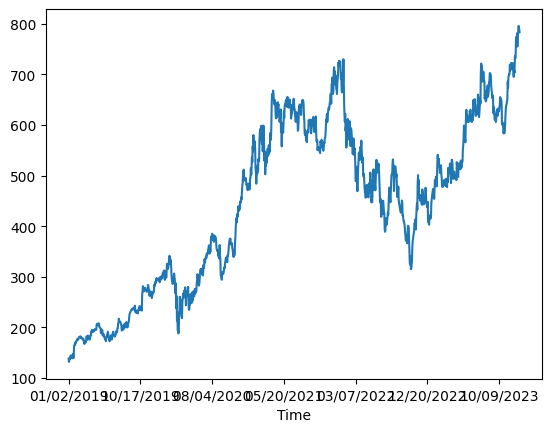

In [79]:
LRCX.plot()

### Combine all Tickers into One DataFrame

In [80]:
sectors = pd.concat([LEN, ASML, AVGO, LRCX, KLAC], axis=1) # concat series; 'axis=1' means each ticker will be its own column
sectors.columns = ['LEN', 'ASML', 'AVGO', 'LRCX', 'KLAC'] # convert series 

In [81]:
sectors.head(10)

,LEN,ASML,AVGO,LRCX,KLAC
Time,,,,,
01/02/2019,39.96,156.30,253.51,138.30,90.91
01/03/2019,39.55,147.68,230.96,131.63,85.81
01/04/2019,41.21,154.07,233.23,138.06,91.30
01/07/2019,42.38,157.59,237.98,139.29,92.60
01/08/2019,42.89,156.43,236.07,136.93,91.13
01/09/2019,46.29,162.92,246.28,144.00,93.48
01/10/2019,45.17,162.61,249.52,144.57,93.71
01/11/2019,46.41,162.02,250.57,144.11,94.03
01/14/2019,45.20,158.69,250.87,140.43,92.43


### Change Each Sector to Percent Change

In [82]:
sectors_returns = sectors.pct_change(1).dropna()

/tmp/ipykernel_18899/1864179842.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sectors_returns = sectors.pct_change(1).dropna()


In [83]:
sectors_returns.head(10)

,LEN,ASML,AVGO,LRCX,KLAC
Time,,,,,
01/03/2019,-0.010260,-0.055150,-0.088951,-0.048228,-0.056099
01/04/2019,0.041972,0.043269,0.009829,0.048849,0.063979
01/07/2019,0.028391,0.022847,0.020366,0.008909,0.014239
01/08/2019,0.012034,-0.007361,-0.008026,-0.016943,-0.015875
01/09/2019,0.079273,0.041488,0.043250,0.051632,0.025787
01/10/2019,-0.024195,-0.001903,0.013156,0.003958,0.002460
01/11/2019,0.027452,-0.003628,0.004208,-0.003182,0.003415
01/14/2019,-0.026072,-0.020553,0.001197,-0.025536,-0.017016
01/15/2019,0.015044,0.003403,0.022402,-0.003062,0.000974


### Calculate Cumulative Percent Returns

<Axes: xlabel='Time'>

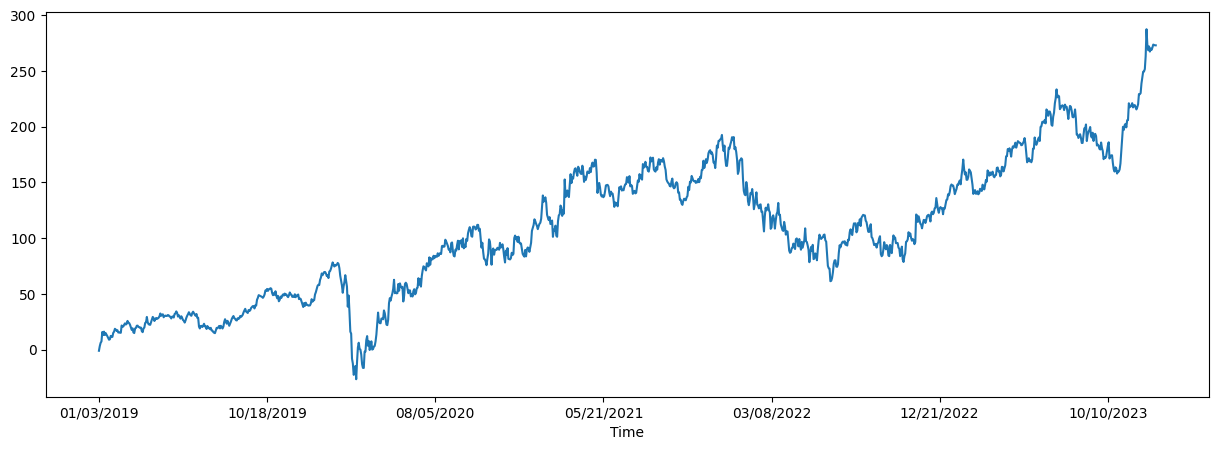

In [84]:
cumul_return = (1 + sectors_returns['LEN']).cumprod() - 1 # cumulative return of LEN
cumul_perc_return = 100 * cumul_return
cumul_perc_return.plot(figsize=(15,5))

#### Example:

In [85]:
# ex_returns = np.array([1, 0.75, 0.5, 0.25, 0.25])
# ex_weights = [20,20,20,20,20]
# np.dot(ex_weights, ex_returns)

### Determine Equal Weighting Return Percent

In [86]:
N = len(sectors_returns.columns) # returns # of columns
N

5

In [87]:
equal_weights = N * [1/N]
equal_weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [88]:
equal_returns = np.dot(equal_weights, sectors_returns.transpose())

In [89]:
equal_returns

array([-0.05173793,  0.04157951,  0.01895041, ..., -0.00552796,
       -0.00484969,  0.        ])

In [90]:
cumul_equal_weighting_returns = (1 + equal_returns).cumprod() - 1

In [91]:
cumul_equal_weighting_returns_perc =  100 * cumul_equal_weighting_returns

In [92]:
cewrp = pd.Series(cumul_equal_weighting_returns_perc, index=sectors_returns.index)
cewrp

Time
01/03/2019                                                    -5.173793
01/04/2019                                                    -1.230966
01/07/2019                                                     0.640747
01/08/2019                                                    -0.087299
01/09/2019                                                     4.737089
                                                                ...    
12/26/2023                                                   462.943344
12/27/2023                                                   463.318020
12/28/2023                                                   460.204023
12/29/2023                                                   457.487207
Downloaded from Barchart.com as of 01-01-2024 01:52pm CST    457.487207
Length: 1258, dtype: float64

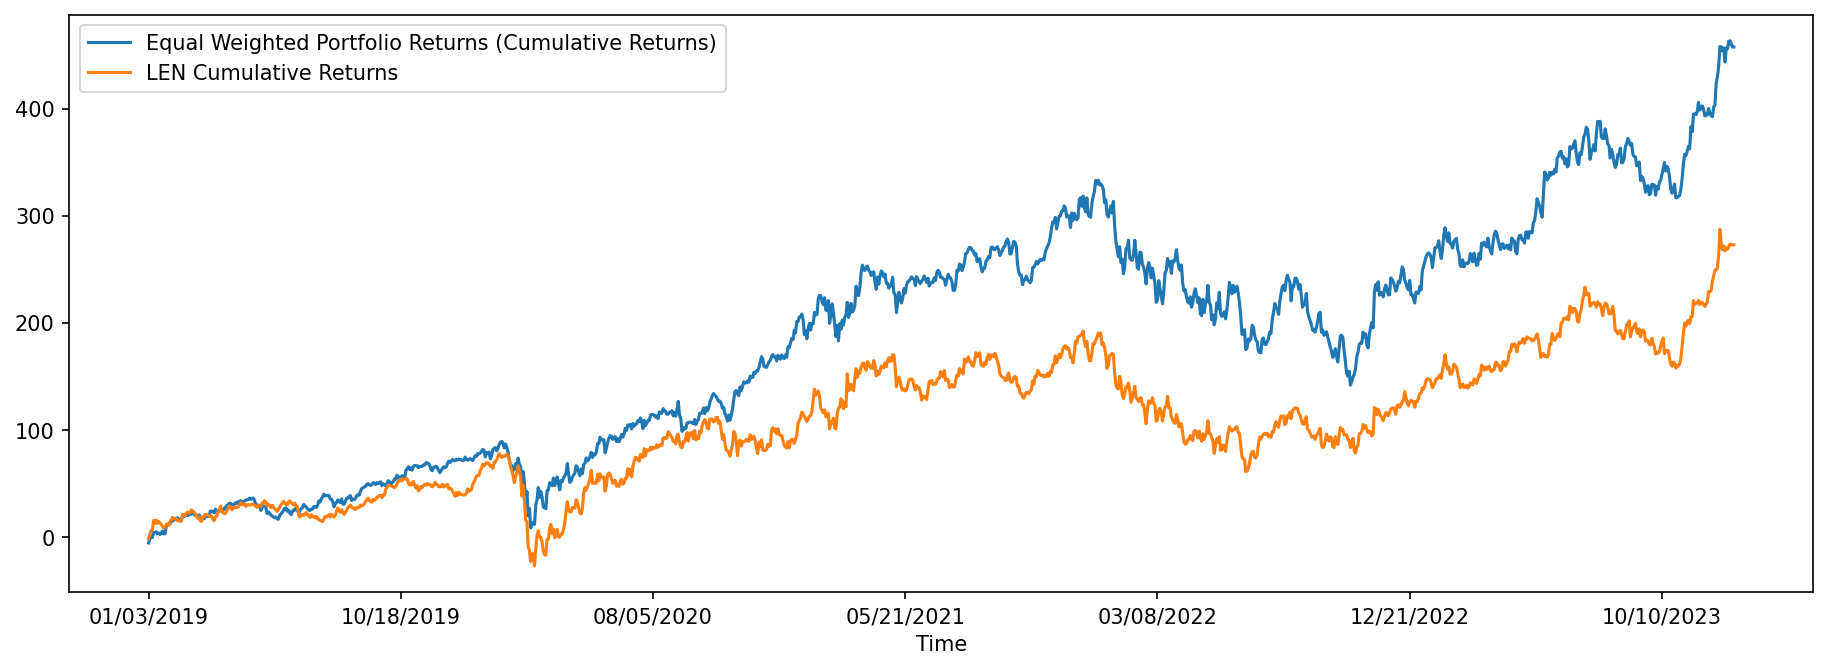

In [93]:
plt.figure(dpi=150)
cewrp.plot(figsize=(15,5), label='Equal Weighted Portfolio Returns (Cumulative Returns)')
cumul_perc_return.plot(figsize=(15,5), label='LEN Cumulative Returns')
plt.legend()
plt.show()

## Monte Carlo

### Get Log Returns

In [94]:
log_returns = np.log(sectors / sectors.shift(1))
log_returns = log_returns.dropna()
log_returns

,LEN,ASML,AVGO,LRCX,KLAC
Time,,,,,
01/03/2019,-0.010313,-0.056729,-0.093159,-0.049430,-0.057734
01/04/2019,0.041115,0.042359,0.009781,0.047693,0.062015
01/07/2019,0.027996,0.022590,0.020162,0.008870,0.014138
01/08/2019,0.011962,-0.007388,-0.008058,-0.017088,-0.016002
01/09/2019,0.076287,0.040651,0.042341,0.050343,0.025460
...,...,...,...,...,...
12/22/2023,-0.003318,-0.003634,-0.004722,0.003944,0.003783
12/26/2023,0.005277,0.013398,0.008794,0.019954,0.014855
12/27/2023,0.007395,0.001769,-0.005066,-0.000981,0.000169


In [95]:
sectors_returns # these numbers should be close to the log_returns

,LEN,ASML,AVGO,LRCX,KLAC
Time,,,,,
01/03/2019,-0.010260,-0.055150,-0.088951,-0.048228,-0.056099
01/04/2019,0.041972,0.043269,0.009829,0.048849,0.063979
01/07/2019,0.028391,0.022847,0.020366,0.008909,0.014239
01/08/2019,0.012034,-0.007361,-0.008026,-0.016943,-0.015875
01/09/2019,0.079273,0.041488,0.043250,0.051632,0.025787
...,...,...,...,...,...
12/26/2023,0.005291,0.013488,0.008833,0.020154,0.014966
12/27/2023,0.007422,0.001770,-0.005053,-0.000980,0.000169
12/28/2023,-0.000804,-0.008089,-0.003339,-0.006617,-0.008792


In [96]:
N = len(sectors.columns)
weights = np.random.random(N)
weights / np.sum(weights)

array([0.20449246, 0.20574296, 0.0986425 , 0.42711455, 0.06400752])

## Define Function to Return Randomly Generated Portfolio Weights

In [97]:
def gen_weights(N):
    weights = np.random.random(N) 
    return weights/np.sum(weights)

In [98]:
gen_weights(5)

array([0.25497802, 0.3048815 , 0.19075419, 0.06940694, 0.17997935])

In [99]:
def calculate_returns(weights, log_returns):
    return np.sum(log_returns.mean() * weights) * 252 # takes average daily returns and multiplies them by the portfolio holdings, multiple by number of trading days per year

### Grab Portfolio Convariance (Volatility)

In [100]:
log_returns.cov()

,LEN,ASML,AVGO,LRCX,KLAC
LEN,0.000734,0.000317,0.000302,0.000395,0.000333
ASML,0.000317,0.000650,0.000439,0.000627,0.000572
AVGO,0.000302,0.000439,0.000543,0.000517,0.000469
LRCX,0.000395,0.000627,0.000517,0.000901,0.000746
KLAC,0.000333,0.000572,0.000469,0.000746,0.000775


In [101]:
def calculate_volatility(weights, log_returns_cov):
    annualized_cov = np.dot(log_returns_cov * 252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [102]:
calculate_volatility(weights, log_returns.cov())

0.7160390711683896

In [103]:
log_returns = np.log(sectors/sectors.shift(1))
log_returns_cov = log_returns.cov()

In [104]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

for sim in range(10000):
    weights = gen_weights(N=5) # N = 'number of stocks'
    mc_weights.append(weights)
    sim_returns = calculate_returns(weights, log_returns)
    mc_portfolio_returns.append(sim_returns)
    sim_volatility = calculate_volatility(weights, log_returns_cov)
    # portfolio_return = calculate_returns(weights, log_returns)
    # portfolio_volatility = calculate_volatility(weights, log_returns_cov)
    mc_portfolio_vol.append(sim_volatility)
    

Text(0, 0.5, 'Returns')

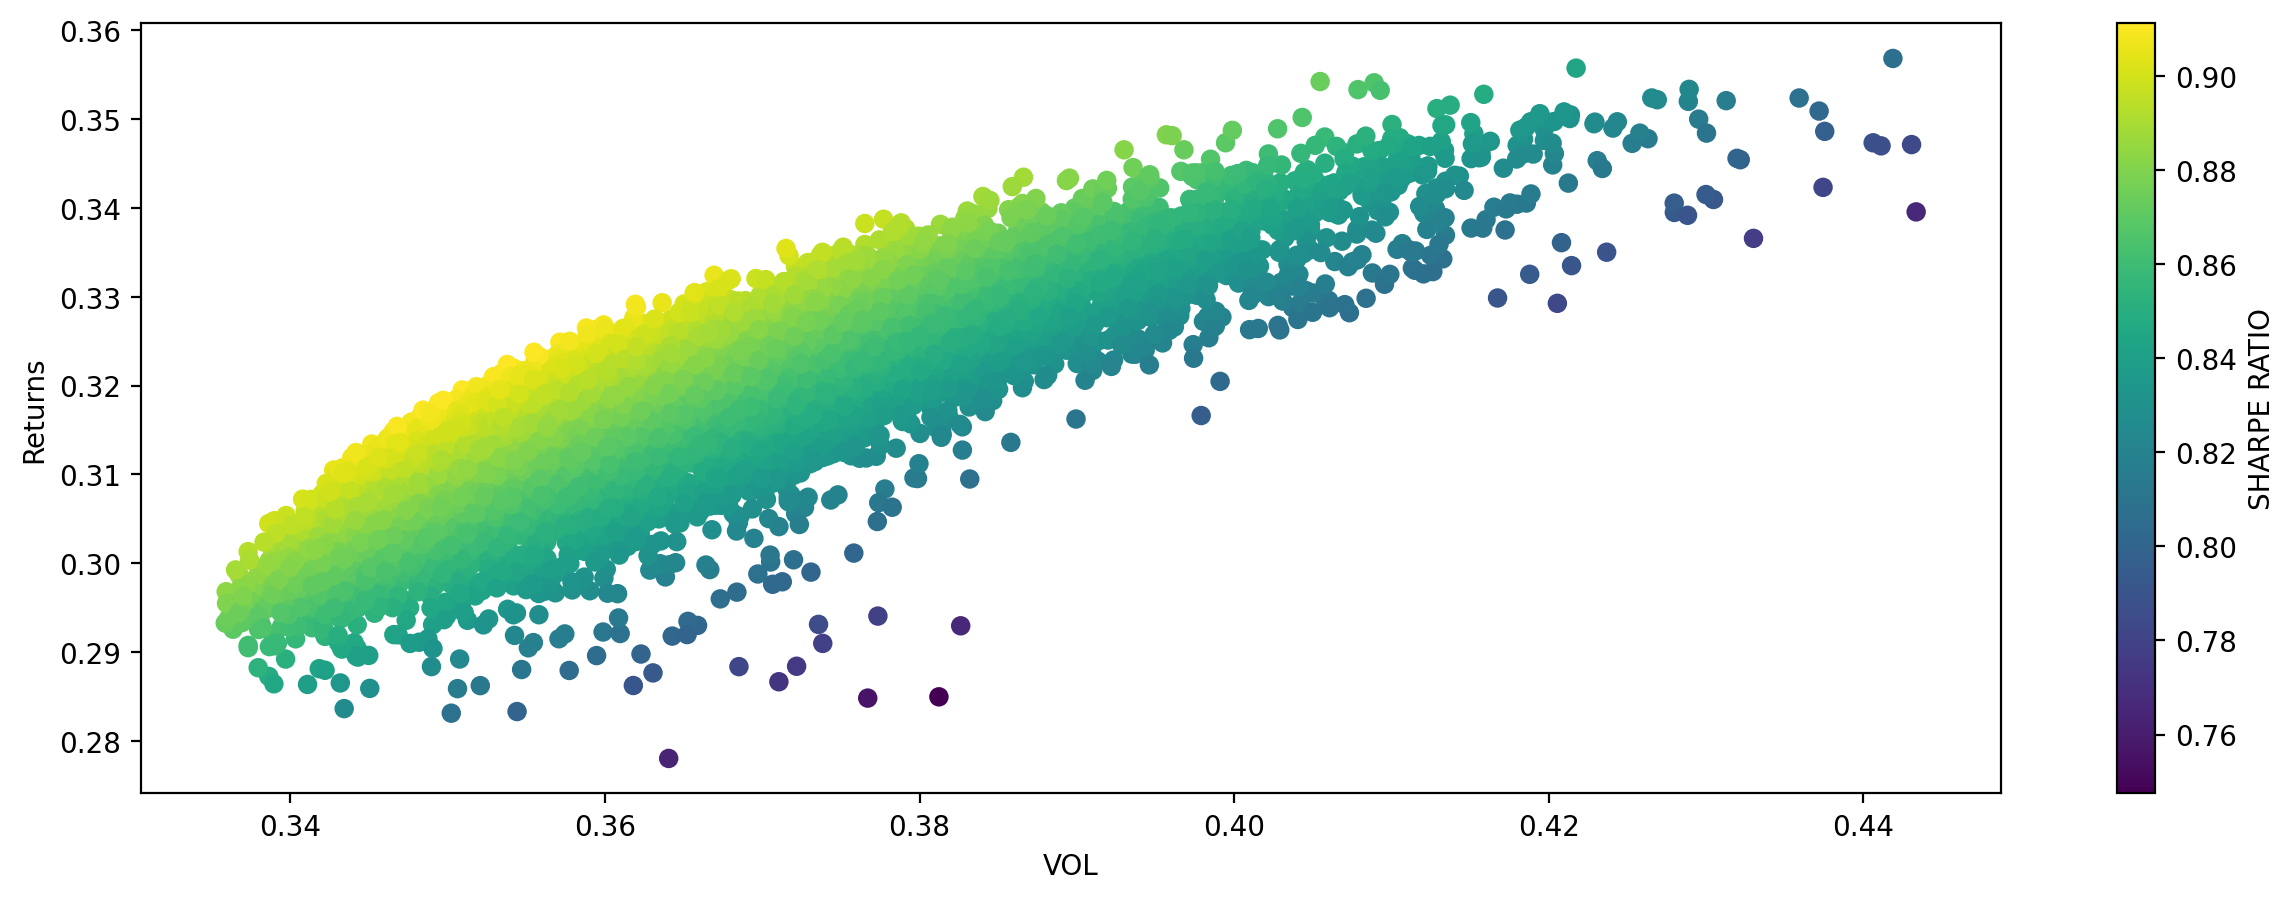

In [105]:
mc_sharpe_ratios = np.array(mc_portfolio_returns) / np.array(mc_portfolio_vol)
plt.figure(dpi=200, figsize=(15,5))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios)
plt.colorbar(label='SHARPE RATIO')
plt.xlabel('VOL')
plt.ylabel('Returns')

## Determine Highest Sharpe Ratio

In [106]:
max_sharper_ratio = np.argmax(mc_sharpe_ratios) # outputs lindex location of highest sharpe ratio
max_sharper_ratio

7532

In [107]:
mc_weights[max_sharper_ratio] # insert highest sharpe index to output optimal portfolio holdings

array([0.17994494, 0.10410951, 0.3232599 , 0.00692152, 0.38576413])

In [108]:
sectors

,LEN,ASML,AVGO,LRCX,KLAC
Time,,,,,
01/02/2019,39.96,156.30,253.51,138.30,90.91
01/03/2019,39.55,147.68,230.96,131.63,85.81
01/04/2019,41.21,154.07,233.23,138.06,91.30
01/07/2019,42.38,157.59,237.98,139.29,92.60
01/08/2019,42.89,156.43,236.07,136.93,91.13
...,...,...,...,...,...
12/26/2023,148.20,762.68,1131.89,795.71,591.37
12/27/2023,149.30,764.03,1126.17,794.93,591.47
12/28/2023,149.18,757.85,1122.41,789.67,586.27


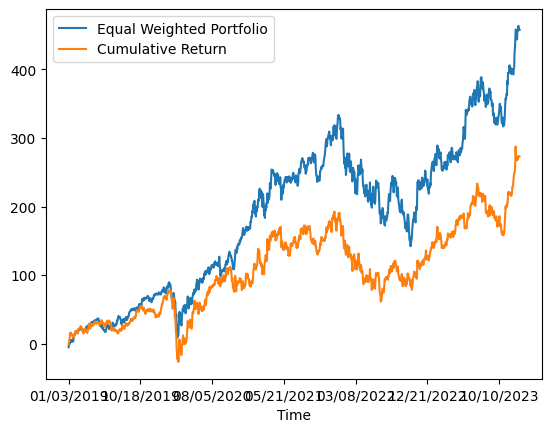

In [109]:
cumul_return = (1 + sectors_returns['LEN']).cumprod() - 1 # enter desired ticker for comparison to Equal Weighted Portfolio
cewrp.plot(label='Equal Weighted Portfolio')
cumul_perc_return.plot(label='Cumulative Return')
plt.legend()

Every Simulation that's run returns most cash be allocated to LEN (lowest was 75% allocation)